In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r'C:\Users\HP\Downloads\iris (1).xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
df['SL'] = df['SL'].fillna(df['SL'].mean())
df['SW'] = df['SW'].fillna(df['SW'].mean())
df['PL'] = df['PL'].fillna(df['PL'].mean())

In [7]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [8]:
#Encoding the classification coiumn
from sklearn.preprocessing import LabelEncoder
le_label = LabelEncoder()
df['Classification'] = le_label.fit_transform(df['Classification'])

In [9]:
df

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


<Axes: >

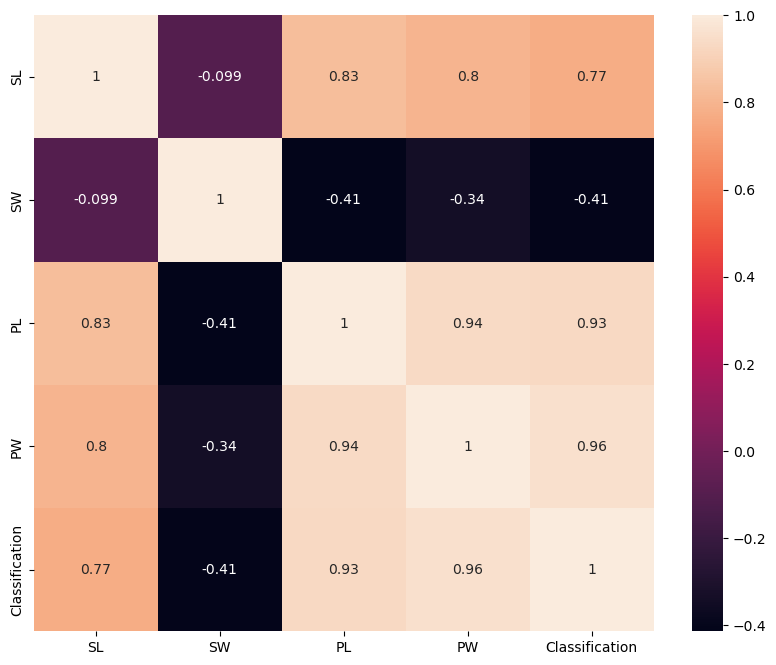

In [10]:
#Checking the corelation of variable
corr_matrix = df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,annot= True)

In [11]:
#importing the libraries for model creation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
x= df.drop('Classification',axis=1)
y= df['Classification']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=.2)

In [14]:
#Logical regression to find the accuracy
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('Accuracy Score of Logistic model is:', accuracy_score(y_test, y_pred))

Accuracy Score of Logistic model is: 1.0


In [15]:
## KNN MODEL
metic_k = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc= accuracy_score(y_test,y_predictions)
    metic_k.append(acc)

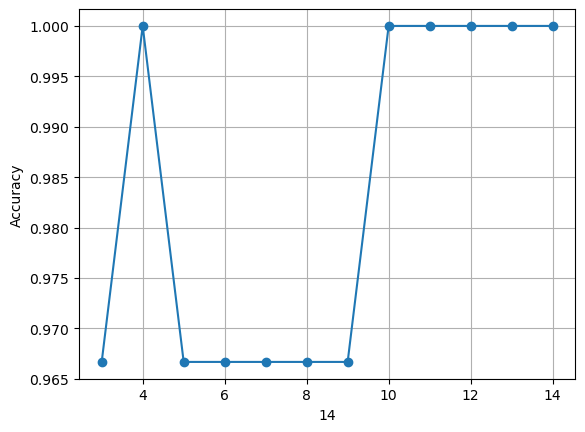

In [16]:
plt.plot(neighbors,metic_k,'o-')
plt.xlabel(k)
plt.ylabel('Accuracy')
plt.grid()

In [17]:
classifier = KNeighborsClassifier(n_neighbors = 4,metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)
print('Accuracy Score of KNN model is:', accuracy_score(y_test, y_predictions))

Accuracy Score of KNN model is: 1.0


In [18]:
# Fitting the Random Tree classifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred= rf_model.predict(x_test)
print('Accuracy Score of Random Forest model is:', accuracy_score(y_test, y_pred))

Accuracy Score of Random Forest model is: 1.0


In [ ]:
# All the models, that is, logistic, svm, KNN model and Random Forest Classifiers are showing an accuracy rate of 100 percent. Hence any model can be used